<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/Pratique_cas_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importation de la bibliotheque de travail
import pandas as pd

#importer les données
diabete = pd.read_excel("/content/sample_data/diabete.xlsx")
diabete.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete
0,0,138,0,0,0,36.3,0.933,25,0.338,0.188,positive
1,4,142,86,0,0,44.0,0.645,22,0.835,0.711,positive
2,3,142,80,15,0,32.4,0.200,63,0.493,0.845,negative
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821,negative
4,5,88,78,30,0,27.6,0.258,37,0.045,0.392,negative


In [2]:
#recodage de la variable cible
recodage = {"positive":1,"negative":0}
diabete["cible"] = diabete["diabete"].map(recodage)
diabete.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete,cible
0,0,138,0,0,0,36.3,0.933,25,0.338,0.188,positive,1
1,4,142,86,0,0,44.0,0.645,22,0.835,0.711,positive,1
2,3,142,80,15,0,32.4,0.200,63,0.493,0.845,negative,0
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821,negative,0
4,5,88,78,30,0,27.6,0.258,37,0.045,0.392,negative,0


In [3]:
#on va isoler ceux qui sont à 0
zero_class=diabete[diabete["cible"]==0]
zero_class.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete,cible
2,3,142,80,15,0,32.4,0.200,63,0.493,0.845,negative,0
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821,negative,0
4,5,88,78,30,0,27.6,0.258,37,0.045,0.392,negative,0
5,2,110,74,29,125,32.4,0.698,27,0.382,0.721,negative,0
6,2,129,84,0,0,28.0,0.284,27,0.992,0.224,negative,0


In [4]:
#on va isoler ceux qui sont à 1
one_class=diabete[diabete["cible"]==1]
one_class.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2,diabete,cible
0,0,138,0,0,0,36.3,0.933,25,0.338,0.188,positive,1
1,4,142,86,0,0,44.0,0.645,22,0.835,0.711,positive,1
10,5,158,84,41,210,39.4,0.395,29,0.343,0.080,positive,1
12,14,100,78,25,184,36.6,0.412,46,0.238,0.576,positive,1
16,0,104,64,37,64,33.6,0.510,22,0.592,0.316,positive,1


In [5]:
#afficher le comptage
print("nb personnes à 0",zero_class.shape)
print("nb personnes à 1",one_class.shape)

nb personnes à 0 (372, 12)
nb personnes à 1 (196, 12)


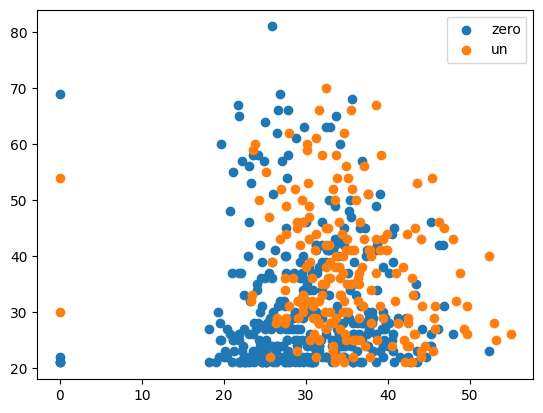

In [6]:
#importer les packages de datavisualisation
import matplotlib.pyplot as plt
import seaborn as sns
#notre graphique de visualisation de la séparation
#entre les deux populations cible à 1 et cible à 0

#croisement entre bodymass et age
plt.scatter(zero_class['bodymass'],zero_class['age'],label="zero")
plt.scatter(one_class['bodymass'],one_class['age'],label="un")
plt.legend()
plt.show()

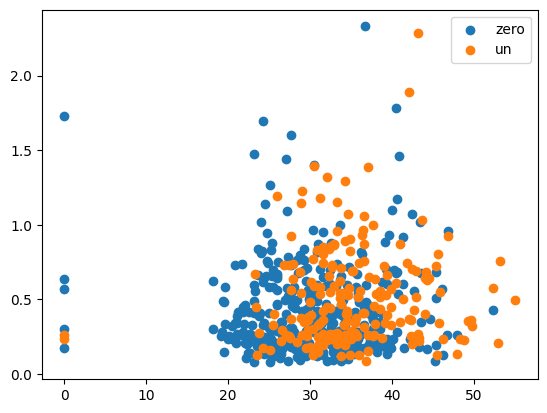

In [7]:
#croisement entre bodymass et pedigree
plt.scatter(zero_class['bodymass'],zero_class['pedigree'],label="zero")
plt.scatter(one_class['bodymass'],one_class['pedigree'],label="un")
plt.legend()
plt.show()

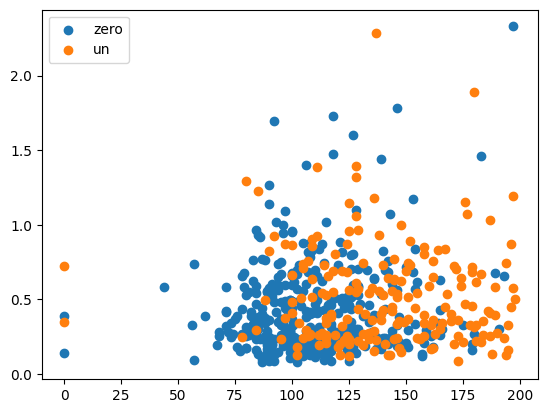

In [8]:
#croissement entre plasma et pedigree
plt.scatter(zero_class['plasma'],zero_class['pedigree'],label="zero")
plt.scatter(one_class['plasma'],one_class['pedigree'],label="un")
plt.legend()
plt.show()

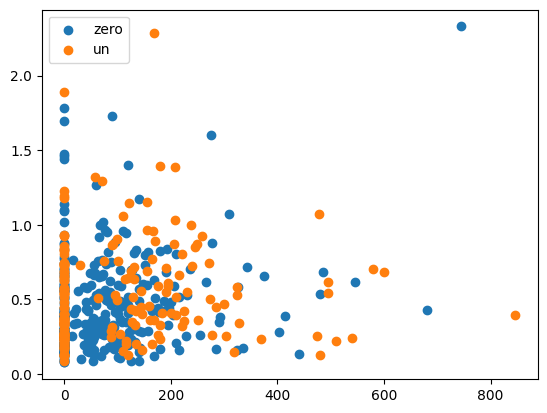

In [9]:
#croissement entre serum et pedigree
plt.scatter(zero_class['serum'],zero_class['pedigree'],label="zero")
plt.scatter(one_class['serum'],one_class['pedigree'],label="un")
plt.legend()
plt.show()

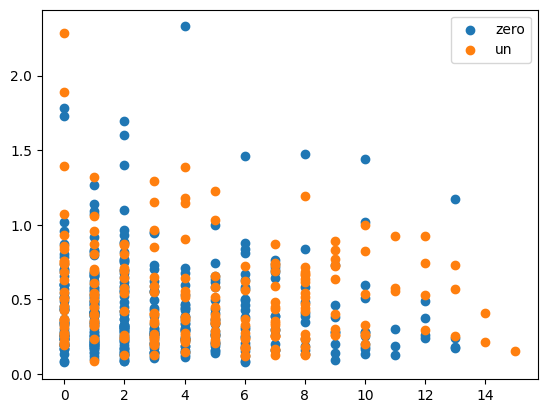

In [10]:
#croissement entre pregnant et pedigree
plt.scatter(zero_class['pregnant'],zero_class['pedigree'],label="zero")
plt.scatter(one_class['pregnant'],one_class['pedigree'],label="un")
plt.legend()
plt.show()

In [11]:
one_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 562
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   196 non-null    int64  
 1   plasma     196 non-null    int64  
 2   diastolic  196 non-null    int64  
 3   triceps    196 non-null    int64  
 4   serum      196 non-null    int64  
 5   bodymass   196 non-null    float64
 6   pedigree   196 non-null    float64
 7   age        196 non-null    int64  
 8   alea1      196 non-null    float64
 9   alea2      196 non-null    float64
 10  diabete    196 non-null    object 
 11  cible      196 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 19.9+ KB


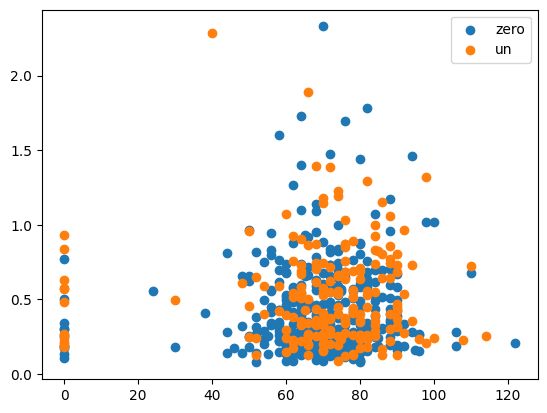

In [12]:
#croissement entre diastolic et pedigree
plt.scatter(zero_class['diastolic'],zero_class['pedigree'],label="zero")
plt.scatter(one_class['diastolic'],one_class['pedigree'],label="un")
plt.legend()
plt.show()

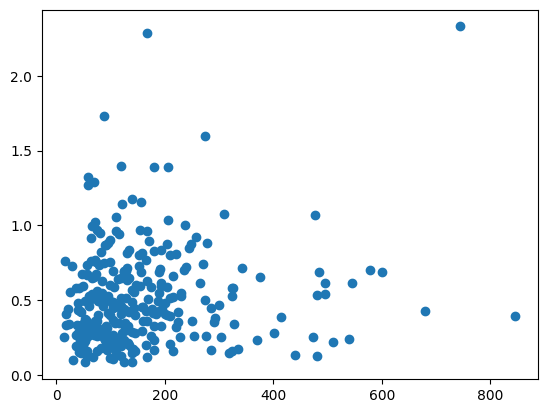

In [13]:
#nettoyage de diabete des valeurs à 0 de serum
diabete_bis=diabete[diabete["serum"]!=0]
plt.scatter(diabete_bis['serum'],diabete_bis['pedigree'])
plt.show()

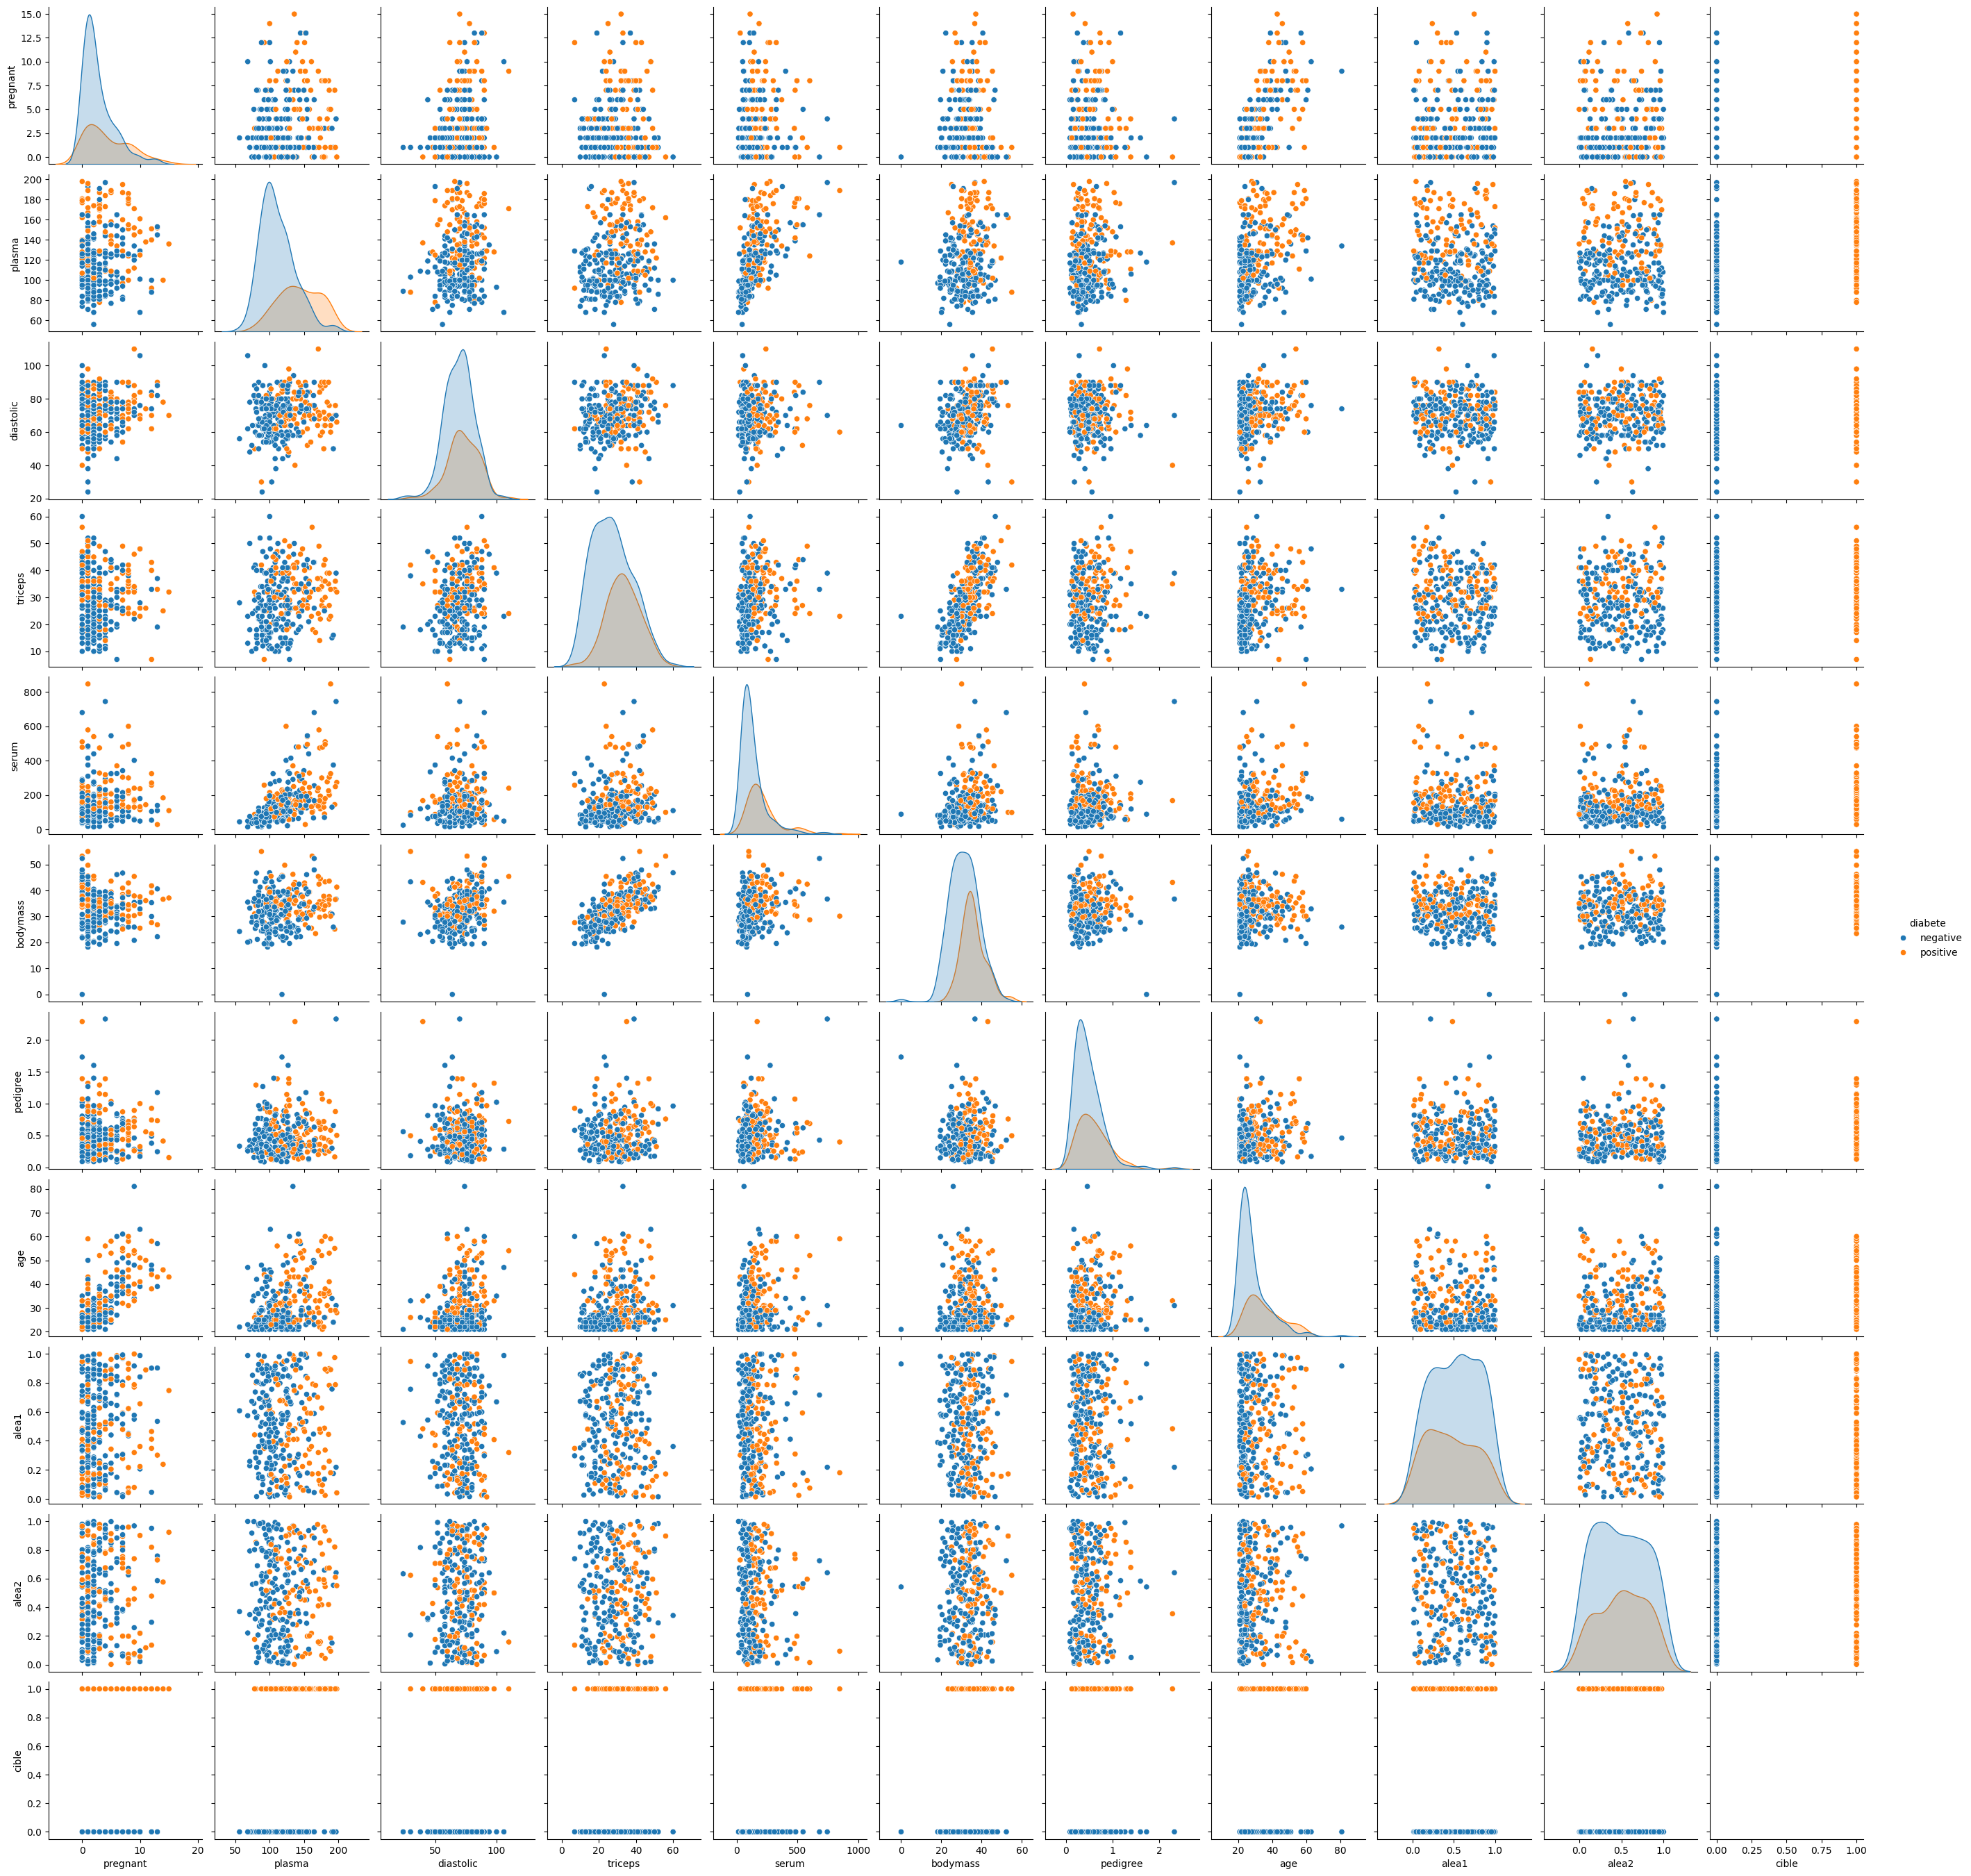

In [16]:
#afficher tous les graphiques de nuages de points possibles
sns.pairplot(diabete_bis,hue="diabete")

In [14]:
#on va isoler les variables explicative
x=diabete_bis.drop(["diabete","cible"],axis=1)
#on va isoler notre variable cible
y=diabete_bis["cible"]
x.head()

,pregnant,plasma,diastolic,triceps,serum,bodymass,pedigree,age,alea1,alea2
3,3,113,50,10,85,29.5,0.626,25,0.857,0.821
5,2,110,74,29,125,32.4,0.698,27,0.382,0.721
8,1,79,60,42,48,43.5,0.678,23,0.736,0.371
9,2,99,70,16,44,20.4,0.235,27,0.478,0.790
10,5,158,84,41,210,39.4,0.395,29,0.343,0.080


In [15]:
#on a une representation des 0 et 1
y.value_counts()

,count
cible,
0,200
1,97


In [26]:
#on crée les échantillons de test et échantillon d'apprentissage
from sklearn.model_selection import train_test_split
X_app,X_test,y_app,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
#taille des échantillons
print("taille echantillon apprentissage", X_app.shape)
print("taille echantillon test", X_test.shape)
print("taille echantillon apprentissage",y_app.shape)
print("taille echantillon test",y_test.shape)

taille echantillon apprentissage (237, 10)
taille echantillon test (60, 10)
taille echantillon apprentissage (237,)
taille echantillon test (60,)


In [28]:
#importer la librairie du modele SVM
from sklearn.svm import SVC
#initialisation du SVM
model_svm =SVC()
#entrainer le modele
model_svm.fit(X_app,y_app)
y_pred=model_svm.predict(X_app)

print(model_svm)



SVC()


In [30]:
#afficher les previsions
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1]


In [31]:
#importer le data frame dans excel
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.to_excel("/content/sample_data/Mesprevis.xlsx")


In [32]:
#on va vérifier la performance du model sur l'échantillon d'apprentissage
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_app,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       160
           1       0.71      0.48      0.57        77

    accuracy                           0.77       237
   macro avg       0.75      0.69      0.71       237
weighted avg       0.76      0.77      0.75       237



In [33]:
#on va vérifier les memes performances sur l'échantillon de test cette fois!!!
y_pred_test=model_svm.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        40
           1       0.77      0.50      0.61        20

    accuracy                           0.78        60
   macro avg       0.78      0.71      0.73        60
weighted avg       0.78      0.78      0.77        60



In [34]:
#matrice de confusion sur l'échantillon d'apprentissage
cm_app=confusion_matrix(y_app,y_pred)
print(cm_app)

[[145  15]
 [ 40  37]]


In [36]:
#matrice de confusion sur l'echantillon test
cm_test=confusion_matrix(y_test,y_pred_test)
print(cm_test)

[[37  3]
 [10 10]]


In [37]:
#je calcul les métriques pour l'échantillon de test
vp_test=cm_test[0,0]
fp_test=cm_test[0,1]
fn_test=cm_test[1,0]
vn_test=cm_test[1,1]
#je calcul les métriques pour l'échantillon d'apprentissage
vp_app=cm_app[0,0]
fp_app=cm_app[0,1]
fn_app=cm_app[1,0]
vn_app=cm_app[1,1]

In [38]:
accuracy_test=(vp_test+vn_test)/(vp_test+vn_test+fp_test+fn_test)
accuracy_app=(vp_app+vn_app)/(vp_app+vn_app+fp_app+fn_app)
print("accuracy test",accuracy_test)
print("accuracy app",accuracy_app)

accuracy test 0.7833333333333333
accuracy app 0.7679324894514767
